Q1-What is K-Nearest Neighbors (KNN) and how does it work?

Ans-KNN is a supervised learning algorithm used for both classification and regression. It works by:

Storing all available data points.

Calculating the distance between the new input and all data points.

Selecting the K closest neighbors.

For classification: it takes a majority vote.

For regression: it takes the average of neighbors' values.

Q2-What is the difference between KNN Classification and KNN Regression?

Ans-In presentation from lectures we only have graphs of errors of mentioned models and no description as to what these models are. KNN regression tries to predict the value of the output variable by using a local average. KNN classification attempts to predict the class to which the output variable belong by computing the local probability.

Q3- What is the role of the distance metric in KNN?

Ans-Distance metrics measure how close data points are. The most common ones:

Euclidean Distance (straight-line)

Manhattan Distance (sum of absolute differences)

Minkowski Distance (generalized form)

It directly affects which neighbors are chosen and thus the model’s performance.


Q4- What is the Curse of Dimensionality in KNN?

Ans-As dimensions increase:

Data becomes sparse.

Distance between points becomes less meaningful.

KNN performance degrades.

This is called the Curse of Dimensionality.

Q5- How can we choose the best value of K in KNN?

Ans-Use cross-validation to test multiple values of K.

Plot error rate vs. K to find the optimal K (elbow method).

Too small K → overfitting; too large K → underfitting.

Q6-What are KD Tree and Ball Tree in KNN?

Ans-These are data structures used to optimize neighbor searches:

KD Tree: Binary tree that partitions space using axis-aligned splits.

Ball Tree: Groups points into hyperspheres for faster distance computation.

Q7- When should you use KD Tree vs. Ball Tree?

Ans-KD Tree is faster in low-dimensional data.

Ball Tree works better in high-dimensional spaces.

Q8-What are the disadvantages of KNN?

Ans-Slow during prediction (lazy learner).

Sensitive to irrelevant or redundant features.

Performance degrades with high dimensions.

Requires feature scaling.

Q9-How does feature scaling affect KNN?

Ans-KNN is distance-based, so features with larger ranges dominate. Scaling (Standardization or Normalization) ensures:

All features contribute equally.

Better accuracy and performance.

Q10-What is PCA (Principal Component Analysis)?

Ans-PCA is an unsupervised dimensionality reduction technique that transforms features into orthogonal components (principal components) capturing maximum variance.

Q11- How does PCA work?

Ans-Steps:

Standardize data.

Compute covariance matrix.

Find eigenvalues and eigenvectors.

Sort eigenvectors by eigenvalues.

Select top components to form reduced data.

Q12-What is the geometric intuition behind PCA?

Ans-PCA finds new axes (principal components) that are:

Orthogonal (perpendicular).

Aligned with directions of maximum variance.

It rotates and projects the data into fewer dimensions.

Q13- What is the difference between Feature Selection and Feature Extraction?

Ans- Feature selection involves choosing a subset of the existing features, while feature extraction creates new features by transforming the original data.

Q14-What are Eigenvalues and Eigenvectors in PCA?

Ans-Eigenvectors: Directions of principal components.

Eigenvalues: Magnitude of variance along each eigenvector.

Q15-How do you decide the number of components to keep in PCA?

Ans-Use:

Explained variance ratio.

Scree plot (look for elbow).

Choose components that explain 95%+ variance.

Q16-Can PCA be used for classification?

Ans-Yes, but indirectly:

PCA is unsupervised.

Used as preprocessing to reduce dimensions before applying classifiers like KNN, SVM, etc.

Q17-What are the limitations of PCA?

Ans-Only captures linear relationships.

Components are not easily interpretable.

Sensitive to scaling.

Loses some information during dimensionality reduction.

Q18- How do KNN and PCA complement each other?

Ans-PCA reduces dimensions → solves Curse of Dimensionality.

KNN works better after PCA in high-dimensional datasets.

PCA speeds up KNN by reducing computation.

Q19- How does KNN handle missing values in a dataset?

Ans-KNN doesn’t inherently handle missing values. Options include:

Imputation: Use KNN Imputer (based on nearest neighbors).

Remove rows/columns with too many missing values.

Q20-What are the key differences between PCA and Linear Discriminant Analysis (LDA)?

Ans-PCA is an unsupervised dimensionality reduction technique that aims to capture the maximum variance in the data, while LDA is a supervised technique that focuses on maximizing the separation between different classes or groups.







In [ ]:
#21  Train a KNN Classifier on the Iris dataset and print model accuracy.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict & evaluate
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [ ]:
#22 Train a KNN Regressor on a synthetic dataset and evaluate using Mean Squared Error (MSE).

from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Create synthetic regression data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Regressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train, y_train)

# Predict & evaluate
y_pred = knn_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 108.14198878074414


In [ ]:
#23 Train a KNN Classifier using different distance metrics (Euclidean and Manhattan) and compare accuracy
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Reload original full Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN with Euclidean distance
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_euclidean.fit(X_train, y_train)
y_pred_euclidean = knn_euclidean.predict(X_test)
print("Euclidean Accuracy:", accuracy_score(y_test, y_pred_euclidean))

# KNN with Manhattan distance
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
knn_manhattan.fit(X_train, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test)
print("Manhattan Accuracy:", accuracy_score(y_test, y_pred_manhattan))


Euclidean Accuracy: 1.0
Manhattan Accuracy: 1.0


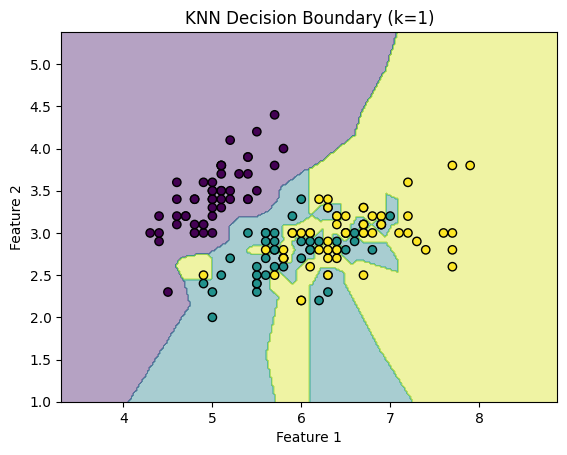

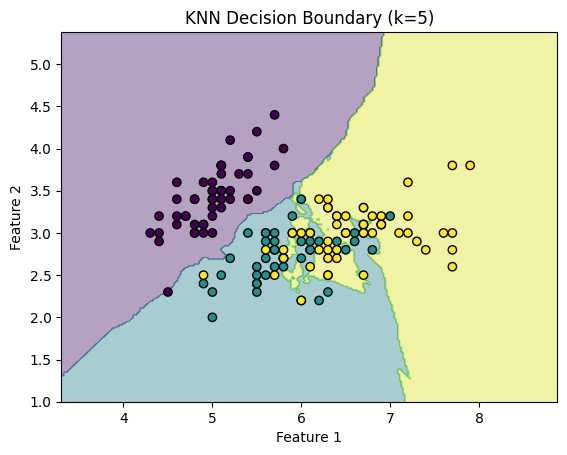

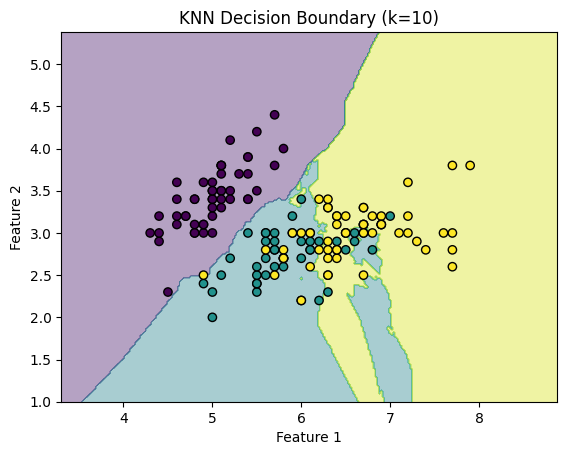

In [ ]:
#24 Train a KNN Classifier with different values of K and visualize decision boundaried.
import numpy as np
import matplotlib.pyplot as plt

# Use only two features
X = iris.data[:, :2]
y = iris.target
h = 0.02  # step size

# Meshgrid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

for k in [1, 5, 10]:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


In [ ]:
#25 Apply Feature Scaling before training a KNN model and compare results with unscaled data.
from sklearn.preprocessing import StandardScaler

# Without scaling
knn_unscaled = KNeighborsClassifier(n_neighbors=3)
knn_unscaled.fit(X_train, y_train)
unscaled_acc = accuracy_score(y_test, knn_unscaled.predict(X_test))
print("Unscaled Accuracy:", unscaled_acc)

# With scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_scaled = KNeighborsClassifier(n_neighbors=3)
knn_scaled.fit(X_train_scaled, y_train)
scaled_acc = accuracy_score(y_test, knn_scaled.predict(X_test_scaled))
print("Scaled Accuracy:", scaled_acc)


Unscaled Accuracy: 1.0
Scaled Accuracy: 1.0


In [ ]:
#26 Train a PCA model on synthetic data and print the explained variance ratio for each component.

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# Generate synthetic data with 5 features
X_synthetic, _ = make_classification(n_samples=100, n_features=5, random_state=42)

# Apply PCA
pca = PCA()
pca.fit(X_synthetic)

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [5.94674217e-01 2.54799657e-01 1.50526126e-01 1.25227371e-16
 0.00000000e+00]


In [ ]:
#27 Apply PCA before training a KNN Classifier and compare accuracy with and without PCA5.

# Without PCA (using scaled data from earlier)
knn_no_pca = KNeighborsClassifier(n_neighbors=3)
knn_no_pca.fit(X_train_scaled, y_train)
acc_no_pca = accuracy_score(y_test, knn_no_pca.predict(X_test_scaled))

# With PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_with_pca = KNeighborsClassifier(n_neighbors=3)
knn_with_pca.fit(X_train_pca, y_train)
acc_with_pca = accuracy_score(y_test, knn_with_pca.predict(X_test_pca))

print("Accuracy without PCA:", acc_no_pca)
print("Accuracy with PCA (2 components):", acc_with_pca)


Accuracy without PCA: 1.0
Accuracy with PCA (2 components): 0.9333333333333333


In [ ]:
#28 Perform Hyperparameter Tuning on a KNN Classifier using GridSearchCV5

from sklearn.model_selection import GridSearchCV

# Grid of hyperparameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Cross-Validation Accuracy: 0.9583333333333334


In [ ]:
#29 Train a KNN Classifier and check the number of misclassified samples.

from sklearn.datasets import load_iris, make_regression, make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


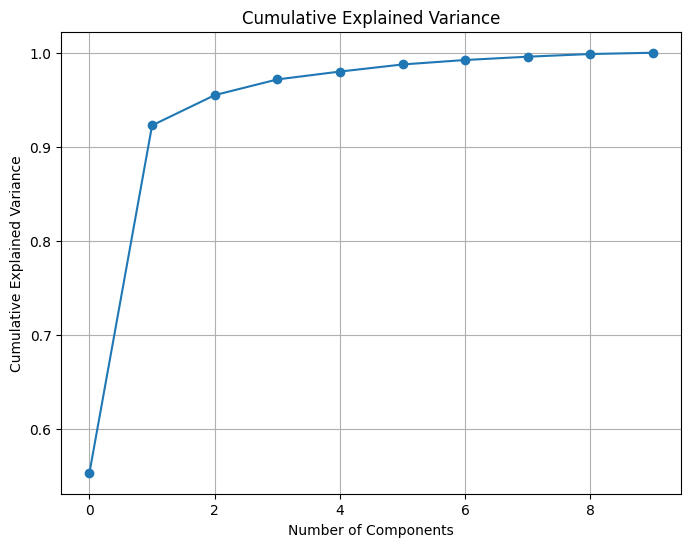

Variance explained by the first 5 components: 0.9799840059984524
Number of components to explain 95% of variance: 3


In [ ]:
#30  Train a PCA model and visualize the cumulative explained variance.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

# 1. Data Preparation
X, _ = make_blobs(n_samples=100, centers=3, random_state=42, n_features=10)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. PCA Model
pca = PCA()
pca.fit(X_scaled)

# 3. Cumulative Explained Variance
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# 4. Visualization
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# 5. Interpretation (Example)
print(f"Variance explained by the first 5 components: {cumulative_variance_ratio[4]}")
print(f"Number of components to explain 95% of variance: {np.where(cumulative_variance_ratio >= 0.95)[0][0] + 1}")

In [ ]:
#31 Train a KNN Classifier using different values of the weights parameter (uniform vs. distance) and compare accuracy.

for weight in ['uniform', 'distance']:
    knn = KNeighborsClassifier(n_neighbors=3, weights=weight)
    knn.fit(X_train_scaled, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test_scaled))
    print(f"{weight.capitalize()} Weight Accuracy:", acc)

Uniform Weight Accuracy: 1.0
Distance Weight Accuracy: 1.0


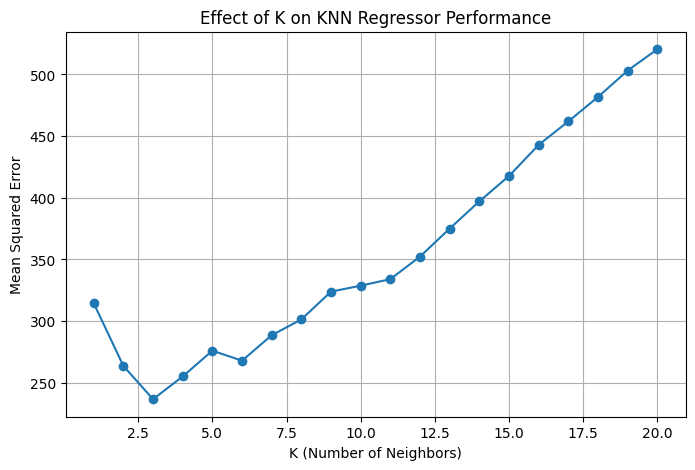

In [ ]:
#32  Train a KNN Regressor and analyze the effect of different K values on performance.
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different K values
k_values = range(1, 21)
mse_scores = []

for k in k_values:
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(k_values, mse_scores, marker='o')
plt.title('Effect of K on KNN Regressor Performance')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()


In [ ]:
#33 Implement KNN Imputation for handling missing values in a dataset.

import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer

# Create a sample dataset with missing values
data = {
    'Feature1': [1, 2, np.nan, 4, 5],
    'Feature2': [7, 6, np.nan, 3, 1],
    'Feature3': [2, np.nan, 9, 8, 7]
}
df = pd.DataFrame(data)
print("Original Data with Missing Values:")
print(df)

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=2)

# Fit and transform the data
imputed_array = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed_array, columns=df.columns)

print("\nData After KNN Imputation:")
print(imputed_df)


Original Data with Missing Values:
   Feature1  Feature2  Feature3
0       1.0       7.0       2.0
1       2.0       6.0       NaN
2       NaN       NaN       9.0
3       4.0       3.0       8.0
4       5.0       1.0       7.0

Data After KNN Imputation:
   Feature1  Feature2  Feature3
0       1.0       7.0       2.0
1       2.0       6.0       5.0
2       4.5       2.0       9.0
3       4.0       3.0       8.0
4       5.0       1.0       7.0


In [ ]:
#34  Train a PCA model and visualize the data projection onto the first two principal components.

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the projection
plt.figure(figsize=(8, 6))
for i, target in enumerate(set(y)):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=target_names[i])

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
#35  Train a KNN Classifier using the KD Tree and Ball Tree algorithms and compare performance.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Compare KD Tree and Ball Tree
algorithms = ['kd_tree', 'ball_tree']
for algo in algorithms:
    print(f"\nUsing algorithm: {algo}")
    model = KNeighborsClassifier(n_neighbors=5, algorithm=algo)

    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    print(f"Accuracy: {acc:.4f}")
    print(f"Training + Prediction Time: {train_time:.4f} seconds")




Using algorithm: kd_tree
Accuracy: 1.0000
Training + Prediction Time: 0.0022 seconds

Using algorithm: ball_tree
Accuracy: 1.0000
Training + Prediction Time: 0.0193 seconds


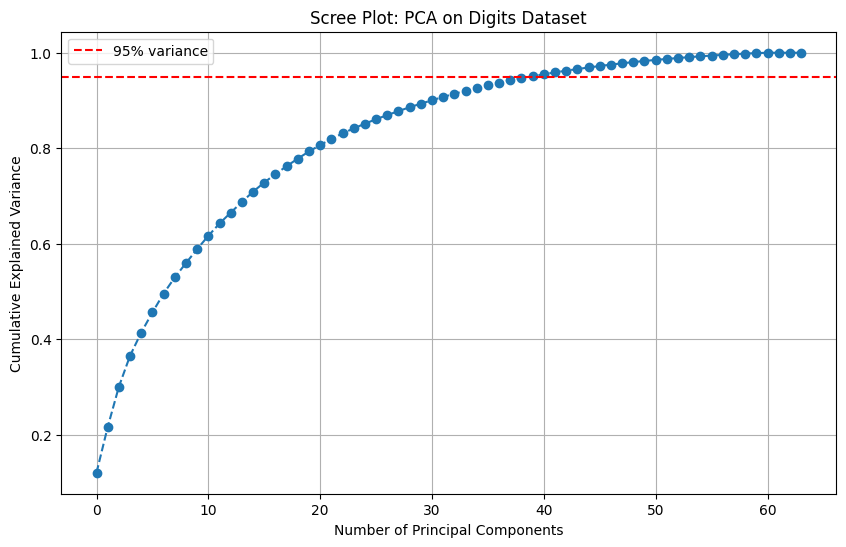

In [17]:
#36 Train a PCA model on a high-dimensional dataset and visualize the Scree plot.

from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load high-dimensional dataset
digits = load_digits()
X = digits.data

# Standardize the data
X_scaled = StandardScaler().fit_transform(X)

# Fit PCA (keep all components)
pca = PCA()
pca.fit(X_scaled)

# Scree plot (explained variance)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot: PCA on Digits Dataset')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.legend()
plt.show()


In [18]:
#37 Train a KNN Classifier and evaluate performance using Precision, Recall, and F1-Score.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate using classification report
report = classification_report(y_test, y_pred, target_names=iris.target_names)
print("Classification Report:\n")
print(report)


Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



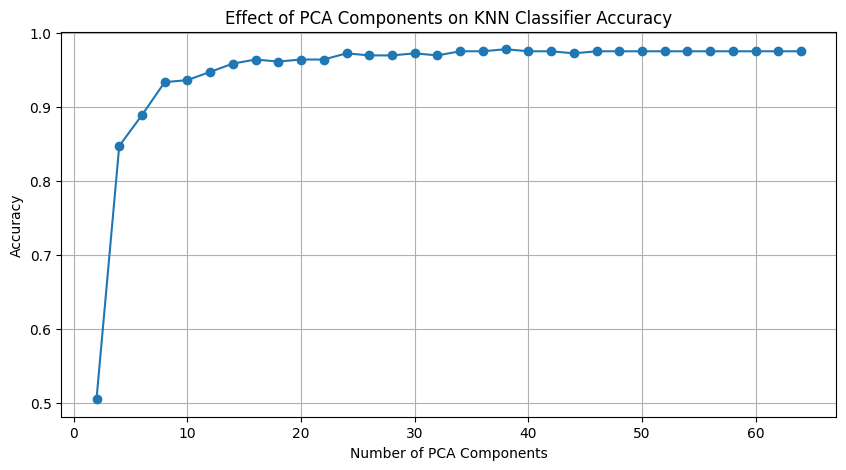

In [19]:
#38 Train a PCA model and analyze the effect of different numbers of components on accuracy.

from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load and standardize dataset
digits = load_digits()
X = StandardScaler().fit_transform(digits.data)
y = digits.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try different numbers of PCA components
components_range = range(2, 65, 2)
accuracies = []

for n in components_range:
    pca = PCA(n_components=n)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(components_range, accuracies, marker='o')
plt.title("Effect of PCA Components on KNN Classifier Accuracy")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()



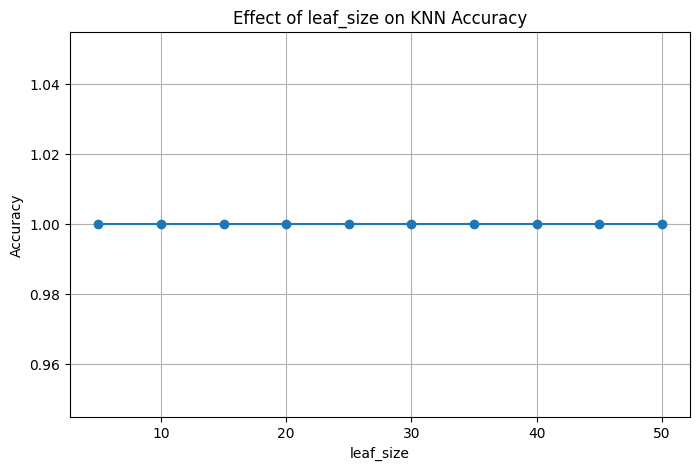

In [20]:
#39 Train a KNN Classifier with different leaf_size values and compare accuracy.

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load data
iris = load_iris()
X, y = iris.data, iris.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Test different leaf_size values
leaf_sizes = range(5, 55, 5)
accuracies = []

for leaf_size in leaf_sizes:
    model = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree', leaf_size=leaf_size)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(leaf_sizes, accuracies, marker='o')
plt.title('Effect of leaf_size on KNN Accuracy')
plt.xlabel('leaf_size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


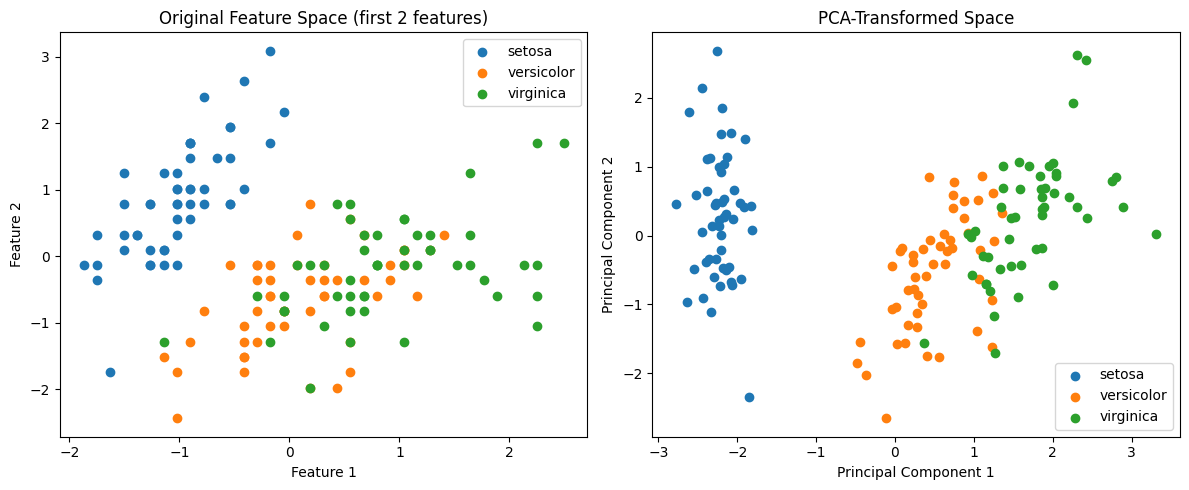

In [21]:
#40 Train a PCA model and visualize how data points are transformed before and after PCA.

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA transformation to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot: Original features (first 2 features as approximation)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, target in enumerate(set(y)):
    plt.scatter(X_scaled[y == target, 0], X_scaled[y == target, 1], label=target_names[i])
plt.title('Original Feature Space (first 2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Plot: PCA-transformed space
plt.subplot(1, 2, 2)
for i, target in enumerate(set(y)):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=target_names[i])
plt.title('PCA-Transformed Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


In [22]:
#41 Train a KNN Classifier on a real-world dataset (Wine dataset) and print classification report.
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target
target_names = wine.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Classification report
print("Classification Report for Wine Dataset:\n")
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report for Wine Dataset:

              precision    recall  f1-score   support

     class_0       0.93      1.00      0.97        14
     class_1       1.00      0.86      0.92        14
     class_2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [23]:
#42 Train a KNN Regressor and analyze the effect of different distance metrics on prediction error.

import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Generate synthetic regression data
X, y = make_regression(n_samples=200, n_features=5, noise=15, random_state=42)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Distance metrics to test
distance_metrics = ['euclidean', 'manhattan']
results = {}

for metric in distance_metrics:
    model = KNeighborsRegressor(n_neighbors=5, metric=metric)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    results[metric] = mse
    print(f"Distance metric: {metric} -> Mean Squared Error: {mse:.4f}")


Distance metric: euclidean -> Mean Squared Error: 1777.3054
Distance metric: manhattan -> Mean Squared Error: 1793.6652


ROC-AUC Score: 0.9959


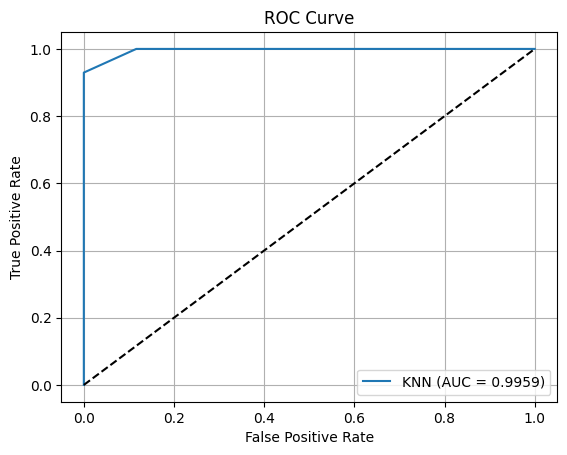

In [24]:
#43 Train a KNN Classifier and evaluate using ROC-AUC score.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN Classifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Predict probabilities for positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate ROC-AUC score
auc = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc:.4f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
plt.plot(fpr, tpr, label=f'KNN (AUC = {auc:.4f})')
plt.plot([0,1], [0,1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


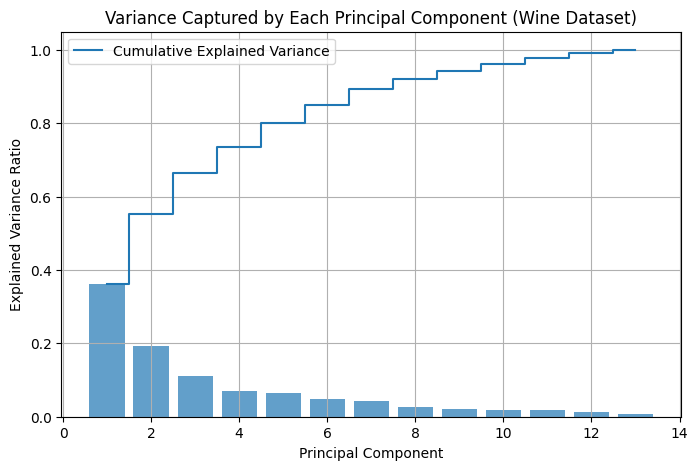

In [25]:
#44 Train a PCA model and visualize the variance captured by each principal component.
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
wine = load_wine()
X = wine.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA (all components)
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Captured by Each Principal Component (Wine Dataset)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


In [26]:
#45  Train a KNN Classifier and perform feature selection before training.
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data
wine = load_wine()
X, y = wine.data, wine.target

# Feature selection: Select top k features (e.g., 5)
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy after feature selection: {accuracy:.4f}")


Accuracy after feature selection: 0.9722


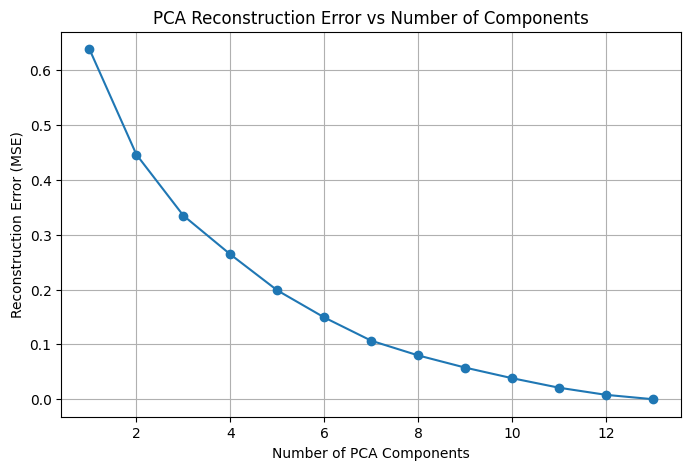

In [27]:
#46 Train a PCA model and visualize the data reconstruction error after reducing dimensions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Load data
wine = load_wine()
X = wine.data

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Try different numbers of components
components = range(1, X.shape[1] + 1)
reconstruction_errors = []

for n in components:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_reconstructed = pca.inverse_transform(X_pca)
    mse = mean_squared_error(X_scaled, X_reconstructed)
    reconstruction_errors.append(mse)

# Plot reconstruction error vs number of components
plt.figure(figsize=(8,5))
plt.plot(components, reconstruction_errors, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('PCA Reconstruction Error vs Number of Components')
plt.grid(True)
plt.show()


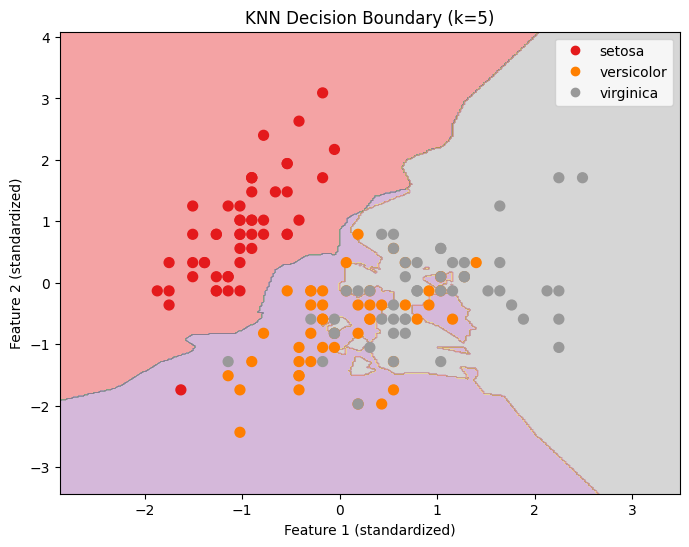

In [33]:
#47 Train a KNN Classifier and visualize the decision boundary.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # First two features
y = iris.target

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_scaled, y)

# Create meshgrid
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict grid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.Set1)

# Scatter plot points
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, s=50, cmap=plt.cm.Set1)

# Fix legend
handles, _ = scatter.legend_elements()
labels = list(iris.target_names)
plt.legend(handles=list(handles), labels=labels)

plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('KNN Decision Boundary (k=5)')
plt.show()


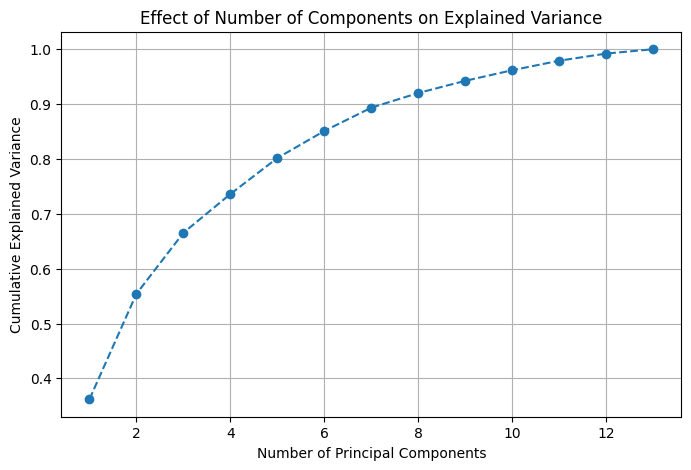

In [34]:
#48  Train a PCA model and analyze the effect of different numbers of components on data variance
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load dataset
data = load_wine()
X = data.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train PCA with all components
pca = PCA(n_components=X.shape[1])
pca.fit(X_scaled)

# Explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Plot cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Effect of Number of Components on Explained Variance')
plt.grid(True)
plt.show()
